## 1. Dependancies and Dataset

### Importing Dependancies

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle as pkl
from wordcloud import WordCloud,STOPWORDS

%matplotlib inline

### Importing Dataset

In [3]:
Drugs = pd.read_csv ("Privos_dataset.csv")
Drugs.head()

,User_ ID,Drug_name,Drug_ID,Condition,Condition_code,rating
0,A10A001,Medroxyprogesterone,DD01,Amenorrhea,CD879,5
1,A10A002,Medroxyprogesterone,DD01,Abnormal Uterine Bleeding,CD910,4
2,A10A003,Medroxyprogesterone,DD01,Birth Control,CD812,4
3,A10A004,Medroxyprogesterone,DD01,Abnormal Uterine Bleeding,CD910,1
4,A10A005,Medroxyprogesterone,DD01,Abnormal Uterine Bleeding,CD910,2


In [4]:
Drugs.shape

(159497, 6)

In [5]:
Drugs.columns

Index(['User_ ID', 'Drug_name', 'Drug_ID', 'Condition', 'Condition_code',
       'rating'],
      dtype='object')

## 2. Data Cleaning

In [6]:
Drugs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159497 entries, 0 to 159496
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   User_ ID        159497 non-null  object
 1   Drug_name       159497 non-null  object
 2   Drug_ID         159497 non-null  object
 3   Condition       159497 non-null  object
 4   Condition_code  159496 non-null  object
 5   rating          159497 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.3+ MB


## DrugRatings are always under 1-5, also Ratings dataset will have n_users  n_books entries if every user rated every item,

In [7]:
Drugs.rating.unique()

array([5, 4, 1, 2, 3], dtype=int64)

## 3. Data Exploration

## Visualising Explicit Rating Counts
Using Seaborn Library for ploting a countplot

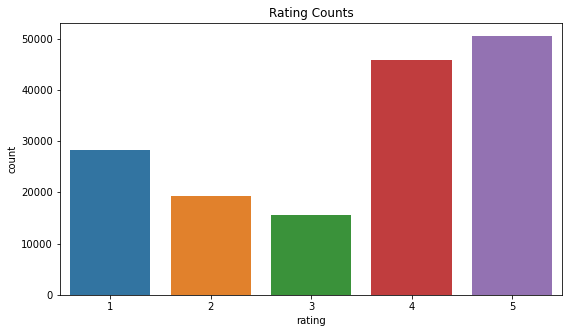

In [8]:
plt.figure(figsize=(9, 5))
plt.title('Rating Counts')
sns.countplot(x = 'rating', data = Drugs);

## Visualising top 30 most Dispensed Drugs
Using Series.value_counts() and sns.barplot for creating data and visualisation respectively

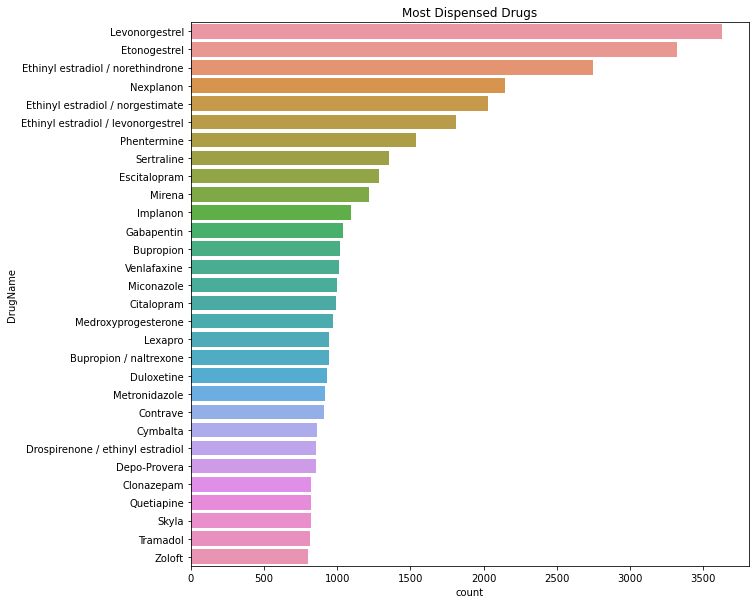

In [9]:
most_read = Drugs.Drug_name.value_counts().reset_index()
most_read.columns = ['DrugName','count']

plt.figure(figsize = (10,10))
plt.title("Most Dispensed Drugs")
sns.barplot(x = 'count', y = 'DrugName', data = most_read.head(30));

## Top rated Drugs(average rating according to number of users)
We may observe many books with average rating equal to 10 and 0 as many of the books are rated only once, hence this can't show us a good visualisation

In [10]:
top_rated = Drugs[['Drug_name','rating']]
top_rated = top_rated.groupby('Drug_name', as_index=False)['rating'].mean()
top_rated = top_rated.sort_values('rating',ascending=False).reset_index()
top_rated = top_rated[['Drug_name','rating']]

top_rated.head()

,Drug_name,rating
0,A + D Cracked Skin Relief,5.0
1,Cefotaxime,5.0
2,Visine Original,5.0
3,Luxiq,5.0
4,VisRx Dose Pack,5.0


In [11]:
top_rated.tail()

,Drug_name,rating
3406,Dong quai,1.0
3407,Belladonna Tincture,1.0
3408,Belladonna,1.0
3409,M-Zole 3,1.0
3410,Capzasin,1.0


## Visualising most frequent words in Condition, Drug_name 
Creating string variables for Condition, Drug_name , also creating a function to plot WordCloud()

In [12]:
Condition_string = " ".join(Drugs['Condition'].astype(str))
Drug_string = " ".join(Drugs['Drug_name'].astype(str))
stop_words = set(STOPWORDS)

def wordcloud(string,title ="unknown"):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21,
                   stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.title(title)
    plt.axis('off')
    plt.imshow(wc)

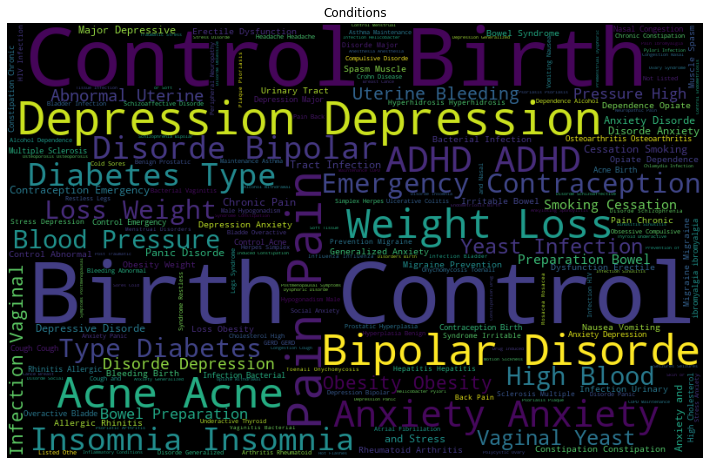

In [13]:
wordcloud(Condition_string,'Conditions')

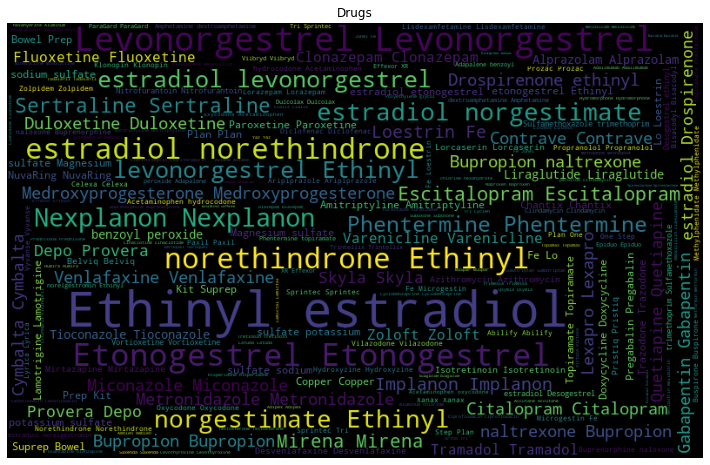

In [14]:
wordcloud(Drug_string,'Drugs')

In [22]:
import scikit- surprise

SyntaxError: invalid syntax (<ipython-input-22-e4a882ec6439>, line 1)